Dylan Gonzalez

**Importation of libraries and data**

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


Saving Station Information.xlsx to Station Information.xlsx


In [4]:
weather = pd.read_csv('weather2.csv')

In [5]:
stations = pd.read_excel('Station Information.xlsx')

**1. Examining the shape of both dataframes**

In [6]:
w = weather.shape
s = stations.shape

print(f'The shape of the weather dataframe is {w} \n')
print(f'The shape of the stations dataframe is {s}')

The shape of the weather dataframe is (100000, 14) 

The shape of the stations dataframe is (29745, 10)


**2. Observing top 5 indexes for both dataframes to get an idea of what they look like**

In [7]:
weather.head()

,Unnamed: 0,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0
1,1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,-9999.0,310.0,57.0,7.0,-9999.0,-9999.0
2,2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,-9999.0,-9999.0
3,3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,-9999.0,320.0,62.0,7.0,-9999.0,-9999.0
4,4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,-9999.0,300.0,72.0,7.0,-9999.0,-9999.0


In [8]:
stations.head()

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323


**3. Dropping column [Unnamed] in weather dataframe**

In [9]:
weather.drop('Unnamed: 0', axis=1, inplace=True)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0
1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,-9999.0,310.0,57.0,7.0,-9999.0,-9999.0
2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,-9999.0,-9999.0
3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,-9999.0,320.0,62.0,7.0,-9999.0,-9999.0
4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,-9999.0,300.0,72.0,7.0,-9999.0,-9999.0


4. **Combining 'USAF' and 'WBAN' columns of 'stations' dataframe to create a new column named 'station_wban' that looks like the one in 'weather' dataframe 'USAF_WBAN`**

In [10]:
stations['station_wban'] = stations['USAF'].astype(str) + '-' + stations['WBAN'].astype(str)
stations.head()

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,station_wban
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730,7018-99999
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822,7026-99999
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926,7070-99999
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920,8260-99999
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323,8268-99999


**5. Joining dataframes to add station name, country (CTRY) and state (ST CALL) to 'weather' dataframe. No need to use 'station's dataframe after joining**

In [11]:
weather['Station Name'] = stations['STATION NAME'].astype(str)
weather['Country'] = stations['CTRY'].astype(str)
weather['State'] = stations['ST CALL'].astype(str)

weather.shape

(100000, 16)

In [12]:
weather.head(1)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,Station Name,Country,State
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0,WXPOD 7018,nan,nan


**7. Displaying descriptive statistics for all numeric columns of 'weather' dataframe. From here, I will ONLY be using 'weather' dataframe**

In [13]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000
mean,2009.34663,6.751760,15.871240,11.483780,136.975390,81.14740,5797.130830,23.626870,33.54303,-1839.430760,-4556.22822,-9511.991990
std,5.49655,3.392016,8.831961,6.926196,361.774103,362.78918,8303.764083,1264.655425,110.06946,3878.528361,4980.57331,2154.103991
min,1999.00000,1.000000,1.000000,0.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.00000,-9999.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,13.00000,10037.000000,70.000000,20.00000,0.000000,-9999.00000,-9999.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.00000,10140.000000,180.000000,31.00000,2.000000,-1.00000,-9999.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.00000,10189.000000,270.000000,46.00000,7.000000,0.00000,-9999.000000
max,2019.00000,12.000000,31.000000,23.000000,9999.000000,9999.00000,10449.000000,999.000000,999.00000,9.000000,2794.00000,1278.000000


**8. Replacing all values 9999, -9999, 999, and -999 (which represent missing values) with nan**

In [14]:
weather.replace(to_replace={9999, -9999, 999,}, value=np.nan, inplace=True)


**9. Displaying updated descriptitve statistics**

In [15]:
weather.describe()

,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
count,100000.00000,100000.000000,100000.000000,100000.000000,99711.000000,99698.000000,78317.000000,97501.000000,99937.000000,81570.000000,54426.000000,4863.000000
mean,2009.34663,6.751760,15.871240,11.483780,144.152882,87.462597,10162.052505,173.352971,34.144951,4.149736,1.315621,15.559120
std,5.49655,3.392016,8.831961,6.926196,110.650054,108.562320,71.561724,112.883343,23.637969,3.341461,18.754512,50.480649
min,1999.00000,1.000000,1.000000,0.000000,-289.000000,-333.000000,9833.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2005.00000,4.000000,8.000000,5.000000,61.000000,14.000000,10121.000000,70.000000,20.000000,0.000000,0.000000,0.000000
50%,2009.00000,7.000000,16.000000,11.000000,156.000000,99.000000,10159.000000,180.000000,31.000000,4.000000,0.000000,0.000000
75%,2015.00000,10.000000,24.000000,17.000000,239.000000,178.000000,10204.000000,270.000000,46.000000,8.000000,0.000000,8.000000
max,2019.00000,12.000000,31.000000,23.000000,420.000000,280.000000,10449.000000,360.000000,175.000000,9.000000,2794.000000,1278.000000


**10. Dividing all weather measures by 10. Weather meaures are inflated with a factor of 10. For example, 289 for `temperature` means 28.9 degrees.**

In [16]:
weather.loc[:,'temperature'] = weather.temperature.apply(lambda x : x/10) #specificallty applying lambda function to 'temperature' column by using loc
weather.loc[:,'dew_point'] = weather.dew_point.apply(lambda x : x/10)
weather.loc[:,'wind_direction'] = weather.wind_direction.apply(lambda x : x/10)

weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,Station Name,Country,State
0,841170-99999,2010.0,1.0,15.0,16.0,27.0,21.0,NaN,30.0,51.0,7.0,NaN,NaN,WXPOD 7018,nan,nan
1,841170-99999,2010.0,1.0,15.0,17.0,27.0,21.0,NaN,31.0,57.0,7.0,NaN,NaN,WXPOD 7026,AF,nan
2,841170-99999,2010.0,1.0,15.0,18.0,27.6,20.8,10115.0,31.0,51.0,7.0,NaN,NaN,WXPOD 7070,AF,nan
3,841170-99999,2010.0,1.0,15.0,19.0,28.0,22.0,NaN,32.0,62.0,7.0,NaN,NaN,WXPOD8270,nan,nan
4,841170-99999,2010.0,1.0,15.0,20.0,28.0,22.0,NaN,30.0,72.0,7.0,NaN,NaN,WXPOD8278,AF,nan


**11. Calculating mean, max, and min values for each measure of weather for each month. Replacing month number with the name of the month in corresponce to the number (Ex. 1 = January)**

In [18]:
weather['month'] = pd.to_datetime(weather['month'], format='%m').dt.month_name() #converting numerical data in 'month' to correspond with month name

weather.groupby(['month']).agg({'temperature': ['mean', 'max', 'min'],
                                    'pressure': ['mean', 'max', 'min']})


                                #'dew_point': ['mean','max','min'],
                                #'wind_direction': ['mean', 'max', 'min'],
                                #'wind_speed': ['mean', 'max', 'min']})


temperature                  pressure                 
                 mean   max   min          mean      max     min
month                                                           
April       11.235925  41.0 -12.8  10158.711732  10415.0  9937.0
August      22.071835  42.0   0.0  10151.368747  10255.0  9983.0
December     5.306827  32.0 -21.1  10184.339681  10407.0  9833.0
February     8.038640  32.0 -28.9  10174.590040  10445.0  9898.0
January      6.927011  32.0 -28.3  10180.833283  10449.0  9837.0
July        21.941066  40.6   0.0  10161.345973  10311.0  9988.0
June        21.231470  42.0   5.0  10138.960690  10289.0  9968.0
March        8.890249  32.5 -18.9  10148.228095  10404.0  9901.0
May         16.960399  36.0  -1.1  10148.055133  10302.0  9924.0
November     9.947000  31.0 -11.1  10181.565503  10380.0  9879.0
October     13.234213  34.0  -7.8  10172.149110  10410.0  9867.0
September   20.016636  36.7  -2.2  10153.077897  10303.0  9940.0

**12. Drawing histograms for 'temperature', 'dew point' , 'pressure' , and 'wind speed' in one figure**

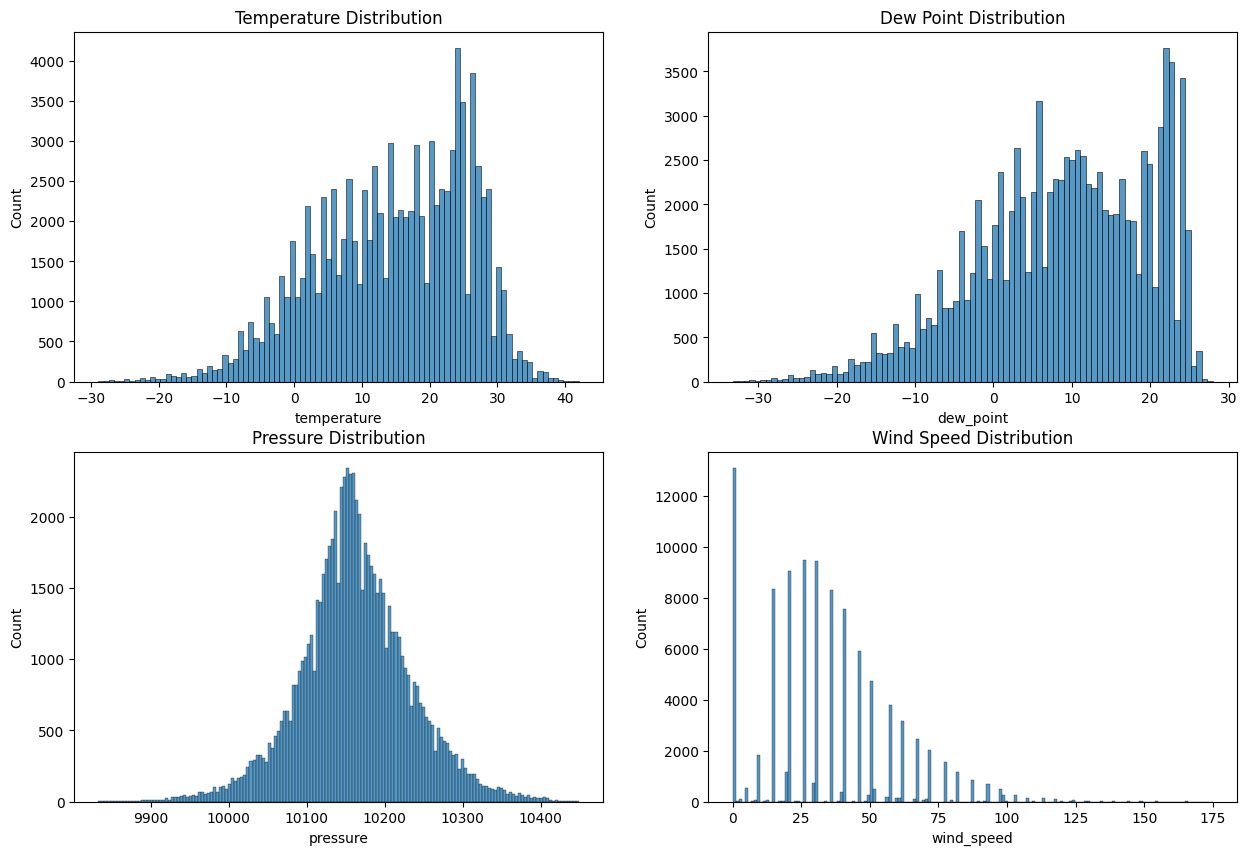

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


sns.histplot(weather['temperature'], ax=axes[0, 0]).set(title='Temperature Distribution')
sns.histplot(weather['dew_point'], ax=axes[0, 1]).set(title='Dew Point Distribution')
sns.histplot(weather['pressure'], ax=axes[1, 0]).set(title='Pressure Distribution')
sns.histplot(weather['wind_speed'], ax=axes[1, 1]).set(title='Wind Speed Distribution');

#Temperature graph is skewed left
#Dew point graph is skewed left
#Pressure grapg is normal
#Win Speed graph is skewed right

**13. Drawing a bar chart that shows average 'temperature' for different months**

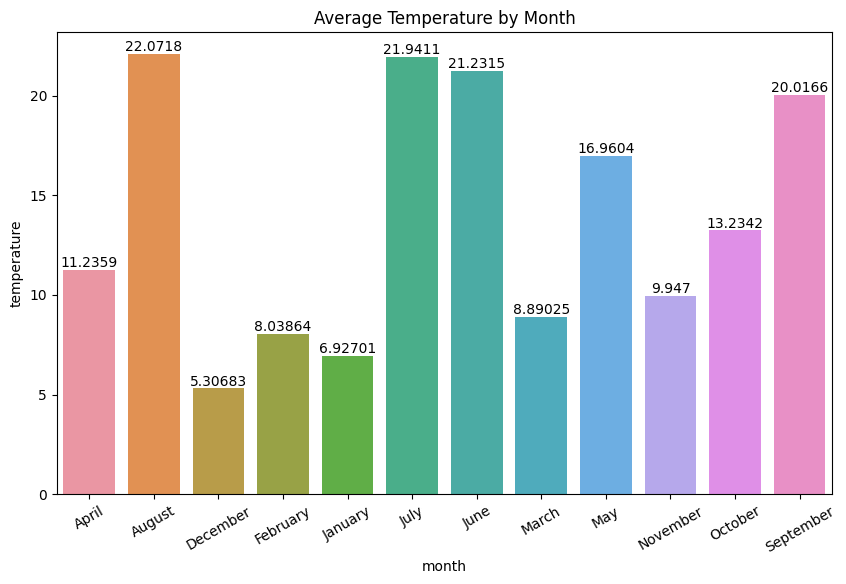

In [36]:
average_temp_by_month = weather.groupby(['month'])['temperature'].mean().reset_index() #recreating new 'linear' index for dataset

plt.figure(figsize=(10, 6))

lx = sns.barplot(x='month', y='temperature', data=average_temp_by_month)
plt.title('Average Temperature by Month')
plt.xticks(rotation=30);

for container in lx.containers:
    lx.bar_label(container) # numerical data labels for bar graphs

**14. Plotting a line chart that shows average temperature over time by year**

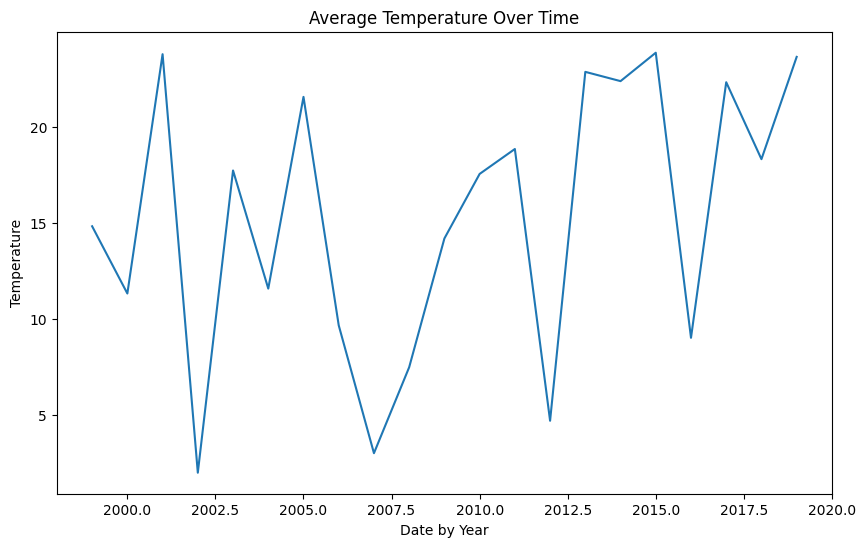

In [37]:
average_temp_over_time = weather.groupby('year')['temperature'].mean().reset_index()
plt.figure(figsize=(10, 6))

plt.plot(average_temp_over_time['year'], average_temp_over_time['temperature'])

plt.title('Average Temperature Over Time')

plt.xlabel('Date by Year')

plt.ylabel('Temperature');

**15. Selecting the top 10 stations that have the most number of records and drawing a bar chat that shows the number of records for each of the 10 stations**

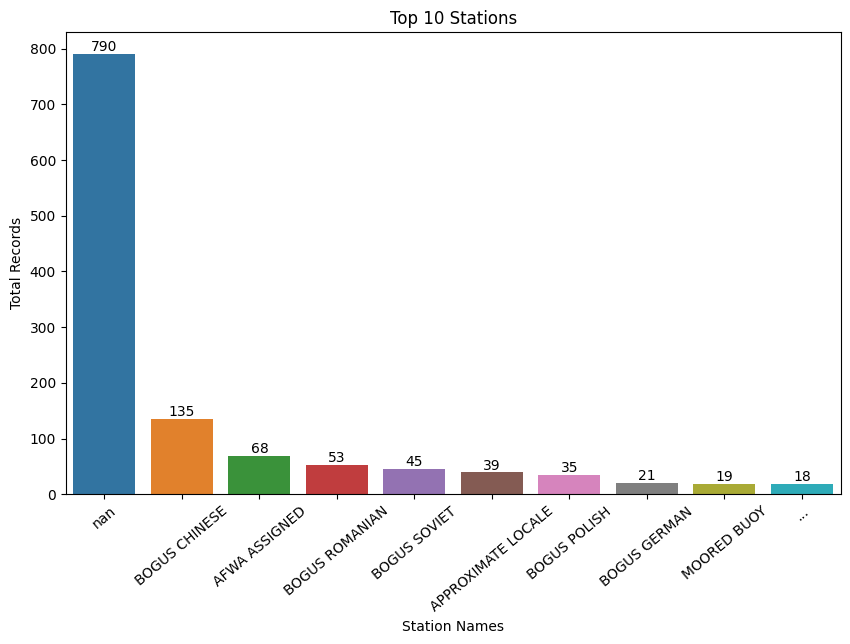

In [67]:
top_stations = weather['Station Name'].value_counts().nlargest(10)

#top_stations

plt.figure(figsize=(10,6))

sx = sns.barplot(x=top_stations.index, y=top_stations.values)
plt.title('Top 10 Stations')
plt.xlabel('Station Names')
plt.ylabel('Total Records')

plt.xticks(rotation=40);

for container in sx.containers:
    sx.bar_label(container)

**16. Creating a new column named 'season' calculated based on month (Ex. Jan, Feb = Winter)**

In [69]:
def set_value(month_name, season_value):  #Created function in order to apply values
    return season_value[month_name]

season_dict = {'January':'Winter', 'February':'Winter', #winter

               'March':'Spring', 'April':'Spring','May':'Spring', #spring

               'June':'Summer','July':'Summer','August':'Summer', #summer

               'September':'Fall','October':'Fall','November':'Fall', #fall

               'December':'Winter'}


weather['seasons'] = weather['month'].apply(set_value, args=(season_dict, ))

data = weather[['month','seasons']] #testing if function applied correct seasons based on month
data

,month,seasons
0,January,Winter
1,January,Winter
2,January,Winter
3,January,Winter
4,January,Winter
...,...,...
99995,September,Fall
99996,September,Fall
99997,September,Fall
99998,September,Fall


**17. Drawing a bar chart that shows average 'temperature' for each season**

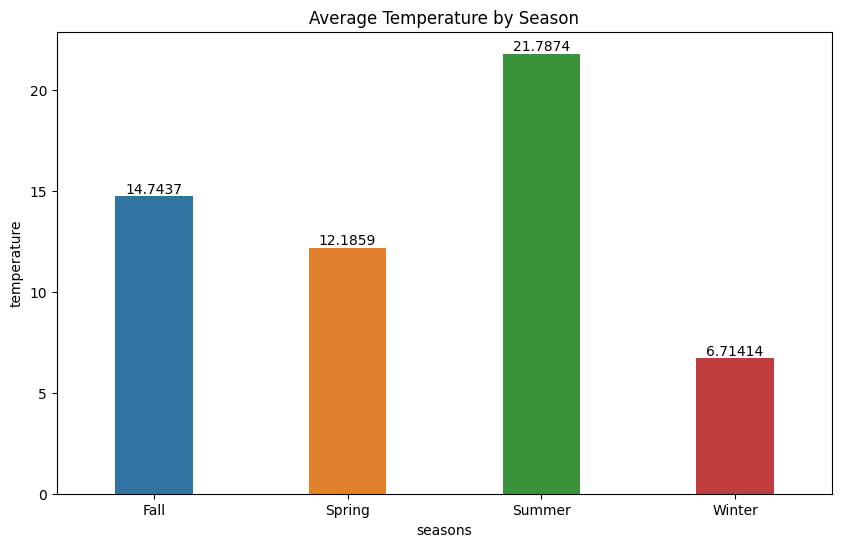

In [72]:
average_temp_by_season = weather.groupby('seasons')['temperature'].mean().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(x='seasons', y='temperature', data=average_temp_by_season, width=.4)

plt.title('Average Temperature by Season')

for container in ax.containers:
    ax.bar_label(container)

**18. Creating a new dataframe named 'normalized_df' that contains normalized values of all measures of weather. 'normalized_df' contains the same columns as the 'weather' dataframe, but weather measures are normalized**

In [73]:
cols_norm = ['temperature','dew_point','pressure', 'wind_speed'] #listing columns to normalize

weather[cols_norm] = weather[cols_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) #function takes specified columns to normalize

normalized_df = pd.DataFrame(weather)

normalized_df

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,Station Name,Country,State,seasons
0,841170-99999,2010.0,January,15.0,16.0,0.788434,0.885808,NaN,30.0,0.291429,7.0,NaN,NaN,WXPOD 7018,nan,nan,Winter
1,841170-99999,2010.0,January,15.0,17.0,0.788434,0.885808,NaN,31.0,0.325714,7.0,NaN,NaN,WXPOD 7026,AF,nan,Winter
2,841170-99999,2010.0,January,15.0,18.0,0.796897,0.882545,0.457792,31.0,0.291429,7.0,NaN,NaN,WXPOD 7070,AF,nan,Winter
3,841170-99999,2010.0,January,15.0,19.0,0.802539,0.902121,NaN,32.0,0.354286,7.0,NaN,NaN,WXPOD8270,nan,nan,Winter
4,841170-99999,2010.0,January,15.0,20.0,0.802539,0.902121,NaN,30.0,0.411429,7.0,NaN,NaN,WXPOD8278,AF,nan,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,785350-11630,2011.0,September,29.0,20.0,0.839210,0.933116,0.413961,3.0,0.262857,0.0,0.0,NaN,NaN,NaN,NaN,Fall
99996,785350-11630,2011.0,September,29.0,21.0,0.815233,0.923328,0.420455,3.0,0.205714,2.0,0.0,NaN,NaN,NaN,NaN,Fall
99997,785350-11630,2011.0,September,29.0,22.0,0.791255,0.933116,0.422078,36.0,0.120000,0.0,0.0,NaN,NaN,NaN,NaN,Fall
99998,785350-11630,2011.0,September,29.0,23.0,0.768688,0.915171,0.438312,25.0,0.234286,0.0,0.0,NaN,NaN,NaN,NaN,Fall


**19. In 'normalized_df', converting all categorical varaibles, except for `station_wban' to dummies**

In [74]:
non_dummies = ['station_wban']

dummies = list(set(normalized_df.columns) - set(non_dummies)) #operation excludes column data specified in 'non_dummies' from list in 'normalized_df' dataframe

normalized_df = pd.get_dummies(normalized_df, columns=dummies) #dummies are created with 'station_ban' being excluded

**20. Check the head of 'normalized_df'**



In [75]:
normalized_df.head()

,station_wban,day_1.0,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0,day_8.0,day_9.0,...,Station Name_ZVERINOGOLOVSKOE,Station Name_ZVEZDNYY,Station Name_ZVISHAVANE,Station Name_ZWEIBRUCKEN,Station Name_ZWEIBRUECKEN,Station Name_ZWERNDORF-MARCHEGG,Station Name_ZWIESEL (AUT),Station Name_ZYRJANOVSK,Station Name_ZYRYANKA,Station Name_nan
0,841170-99999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,841170-99999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,841170-99999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,841170-99999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,841170-99999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
